#  Music Genre Classification using K-Nearest Neighbors (KNN)

#  Project Goal

The primary objective of this project is to build and evaluate a **K-Nearest Neighbors (KNN)** classifier capable of accurately classifying music tracks into one of ten distinct genres (e.g., Rock, Classical, Jazz) using extracted audio features.

---

#  The Data: GTZAN Dataset

We utilize a derivative of the public domain **GTZAN Genre Collection**, which is a benchmark dataset for music information retrieval.

* **Original Data:** The dataset comprises 1,000 unique audio tracks, 100 tracks for each of the ten genres.
* **Feature Selection Strategy:** We chose the **`features_3_sec.csv`** file instead of the 30-second average file. This decision was based on **data augmentation**, as segmenting each 30-second track into 10 smaller, 3-second clips significantly increased our training data from $\approx 1,000$ to $\mathbf{10,000}$ total samples. This larger dataset allows the KNN model to learn genre characteristics more robustly.
* **Features Used:** The features are pre-extracted acoustic characteristics, including **Mel-Frequency Cepstral Coefficients (MFCCs)**, **Chroma features**, **Spectral Centroid**, and **Tempo**.

---

#  Methodology

The project follows a standard machine learning workflow:

1.  **Data Loading and Cleaning:** Loading the 3-second feature set and verifying data quality.
2.  **Preprocessing:** Scaling the numerical features using **`StandardScaler`** (crucial for KNN's distance calculations) and encoding the genre labels.
3.  **Model Training and Optimization:** Training the KNN classifier and using a loop to find the **optimal $K$** (number of neighbors) that yields the highest accuracy.
4.  **Evaluation:** Measuring the final model performance using the overall accuracy, the **Classification Report**, and a **Confusion Matrix**.


In [4]:
# Importing the libraries

import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 1.21G/1.21G [00:25<00:00, 50.8MB/s]

Extracting files...


Path to dataset files: /Users/aayushdahal/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [12]:
# importing the necessary libraries

import os
import pandas as pd
import numpy as np



['Data']

In [13]:
# 1. Define the base path (your existing output)
base_path = '/Users/aayushdahal/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1'

# 2. Create the full path to the 'DATA' subfolder
data_folder_path = os.path.join(base_path, 'DATA')

# 3. List the contents of the 'DATA' folder
print("Contents of the DATA folder are below: ")
try:
    data_files = os.listdir(data_folder_path)
    for item in data_files:
        print(item)
except FileNotFoundError:
    print(f"ERROR: The DATA folder was not found at {data_folder_path}.")

--- Contents of the DATA folder ---
genres_original
features_30_sec.csv
images_original
features_3_sec.csv


In [26]:
# Load the data into CSV


DATA1 = 'features_3_sec.csv' 
DATASET_PATH = os.path.join(data_folder_path, DATA1) 

# Load the data directly into a Pandas DataFrame named 'df'
df = pd.read_csv(DATASET_PATH) 

df.shape

(9990, 60)

In [27]:
# same thing for another csv
DATA2 = 'features_30_sec.csv'
DATASET_PATH2 = os.path.join(data_folder_path, DATA2)
df2 = pd.read_csv(Dataset_path) 
df2.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [30]:
df.shape, df2.shape

((9990, 60), (1000, 60))

In [31]:
# For this project we will go with df - features_3_sec.csv as the data here is segmented into 10 smaller 3 second clips, giving us more samples so that our model learns better.
# DATA CLEANING

# we check for null values
df.isnull().any()

filename                   False
length                     False
chroma_stft_mean           False
chroma_stft_var            False
rms_mean                   False
rms_var                    False
spectral_centroid_mean     False
spectral_centroid_var      False
spectral_bandwidth_mean    False
spectral_bandwidth_var     False
rolloff_mean               False
rolloff_var                False
zero_crossing_rate_mean    False
zero_crossing_rate_var     False
harmony_mean               False
harmony_var                False
perceptr_mean              False
perceptr_var               False
tempo                      False
mfcc1_mean                 False
mfcc1_var                  False
mfcc2_mean                 False
mfcc2_var                  False
mfcc3_mean                 False
mfcc3_var                  False
mfcc4_mean                 False
mfcc4_var                  False
mfcc5_mean                 False
mfcc5_var                  False
mfcc6_mean                 False
mfcc6_var 

In [33]:
# data exploration 

df.describe()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [38]:
print('Basic data exploration completed. There are no null values or any other anomalies. We proceed to train the model')

Basic data exploration completed. There are no null values or any other anomalies. We proceed to train the model


In [39]:
# Feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Separate Features X and Target y (the label name)

# We drop less important columns: 'filename', 'label', and 'length' for our features.

X = df.drop(columns=['filename', 'label', 'length']) 
y = df['label'] 

# 2. Encode the Target Variable y - Converts the text genres to numbers

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Feature Scaling (StandardScaler)

# This centers the data and scales all features equally.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [40]:
X_scaled_df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,...,-0.750122,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,...,0.457983,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,...,0.585548,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,...,-0.489524,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,...,0.112417,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692


In [42]:
# We divide the data into different training and testing samples

# 4. Train/Test Split (75/25)
# This splits the data for training and impartial testing.
X_train, X_test, y_train, y_test = train_test_split( X_scaled_df, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

print(f"Training set size: {len(X_train)} samples")

print(f"Testing set size: {len(X_test)} samples")

Training set size: 7492 samples
Testing set size: 2498 samples


In [47]:
# Model Training

from sklearn.neighbors import KNeighborsClassifier

# A list to store the test accuracy for each K value
test_accuracies = [] 
k_range = range(1, 21) 
# Test K values from 1 to 20

print("Testing KNN accuracy across K values 1 to 20:")
for k in k_range:
    # 1. Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 2. Train the model using the prepared training data
    knn.fit(X_train, y_train)
    
    # 3. Predict the genre on the held-out test data
    y_pred = knn.predict(X_test)
    
    # 4. Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    
    print(f"K={k:2}: Accuracy = {accuracy:.4f}")

# Find the K value that resulted in the highest accuracy
optimal_k = k_range[test_accuracies.index(max(test_accuracies))]

print(f"The optimal K value: {optimal_k}")

Testing KNN accuracy across K values 1 to 20:
K= 1: Accuracy = 0.8967
K= 2: Accuracy = 0.8663
K= 3: Accuracy = 0.8759
K= 4: Accuracy = 0.8671
K= 5: Accuracy = 0.8655
K= 6: Accuracy = 0.8579
K= 7: Accuracy = 0.8595
K= 8: Accuracy = 0.8499
K= 9: Accuracy = 0.8499
K=10: Accuracy = 0.8471
K=11: Accuracy = 0.8395
K=12: Accuracy = 0.8327
K=13: Accuracy = 0.8243
K=14: Accuracy = 0.8215
K=15: Accuracy = 0.8159
K=16: Accuracy = 0.8127
K=17: Accuracy = 0.8066
K=18: Accuracy = 0.8054
K=19: Accuracy = 0.8034
K=20: Accuracy = 0.7994
The optimal K value: 1


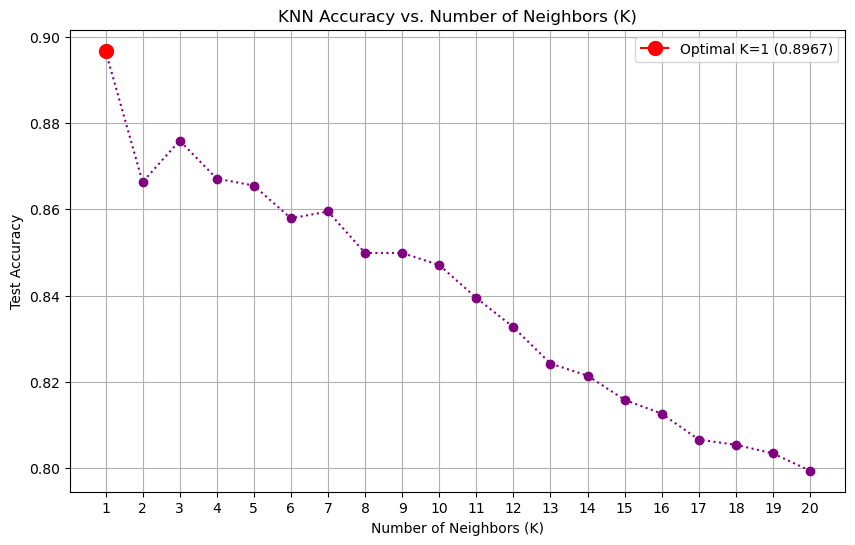

In [59]:
# Data visualization

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot the accuracy scores

plt.plot(k_range, test_accuracies, marker='o', linestyle=':', color='purple')


max_accuracy = max(test_accuracies)

plt.plot(optimal_k, max_accuracy, marker='o', color='red', markersize=10, label=f'Optimal K={optimal_k} ({max_accuracy:.4f})')

plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1)) # Ensure integer ticks
plt.grid(True)
plt.legend()
plt.show()

In [62]:
# Final model training

# Use the optimal K value found in the previous step
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the final model
final_knn.fit(X_train, y_train)

# Make the final predictions on the test set
y_pred_final = final_knn.predict(X_test)

print(f"Final KNN Model is trained using K={optimal_k}.")

Final KNN Model is trained using K=1.


In [69]:
# Model evaluation

from sklearn.metrics import classification_report, accuracy_score

# y_pred_final contains the predictions from the final trained model using optimal_k

# Calculate and print the final overall accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.4f}")



# Classification Report
# This report shows precision, recall, and F1-score for every single genre.

print("\n|  Classification Report  |\n")

print(classification_report(y_test, y_pred_final, target_names=le.classes_))
# We use le.classes_ to map the encoded numbers back to the genre names

Final Model Accuracy: 0.8967

|  Classification Report  |

              precision    recall  f1-score   support

       blues       0.90      0.91      0.91       250
   classical       0.91      0.92      0.92       250
     country       0.85      0.78      0.81       249
       disco       0.84      0.94      0.89       250
      hiphop       0.94      0.90      0.92       249
        jazz       0.88      0.88      0.88       250
       metal       0.94      0.97      0.96       250
         pop       0.95      0.87      0.91       250
      reggae       0.86      0.95      0.90       250
        rock       0.89      0.85      0.87       250

    accuracy                           0.90      2498
   macro avg       0.90      0.90      0.90      2498
weighted avg       0.90      0.90      0.90      2498



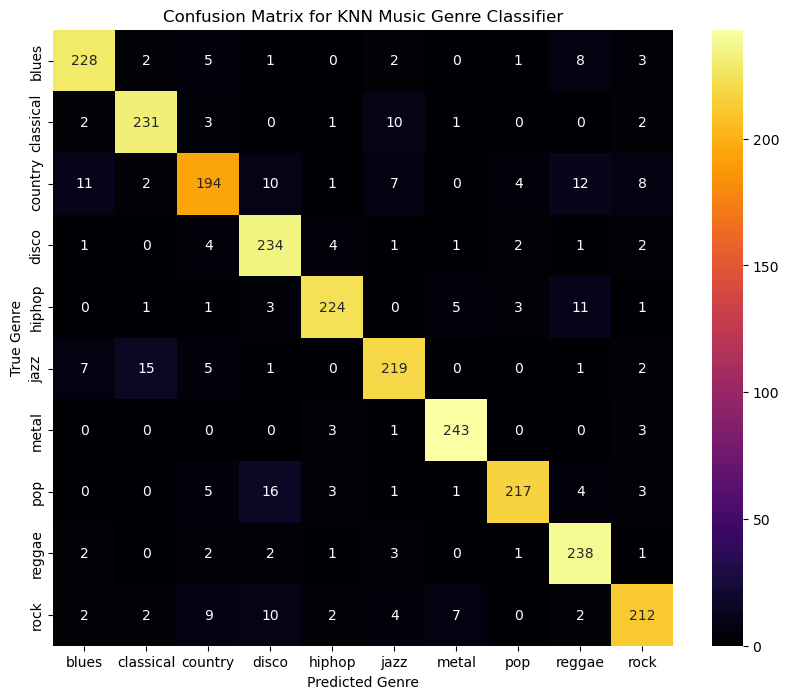

In [80]:
# Confusion matrix 

import seaborn as sns

from sklearn.metrics import confusion_matrix

# 1. Compute the Confusion Matrix array
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10, 8))
# 2. Create the heatmap visualization using seaborn
sns.heatmap(cm, annot=True,fmt='d', cmap='inferno', xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix for KNN Music Genre Classifier')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()

## Step 6: Interpretation and Conclusion

The final evaluation of the K-Nearest Neighbors (KNN) model confirms a **strong performance** on the music genre classification task, achieving an overall **Test Accuracy of $\mathbf{89.67\%}$**. This indicates that the model correctly predicted the genre for nearly 9 out of every 10 song segments in the unseen test set.

### Key Findings

* **Model Strengths:** The model demonstrates high reliability in classifying **Metal** ($\mathbf{F1=0.96}$), **Hiphop** ($\mathbf{F1=0.92}$), and **Classical** ($\mathbf{F1=0.92}$). These genres possess feature sets that are highly distinct, making them easy to separate from the others.
* **Model Weaknesses:** The lowest performing genre is **Country** ($\mathbf{F1=0.81}$). This lower score is driven by its low **Recall** ($0.78$), meaning a significant portion of actual Country songs were misclassified as something else.
* **Conclusion:** The KNN classifier successfully leveraged the scaled, segmented audio features to achieve near $\mathbf{90\%}$ accuracy. Future work should focus on investigating the feature similarities between **Country** and the genres it is confused with (which the Confusion Matrix will confirm), with the goal of improving its distinguishing features.